In [1]:
import torch
import numpy as np

In [2]:
x = torch.zeros(3,4)
x.add_(2)

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]])

Gradient Calculation With Autograd

In [3]:
x = torch.rand(4 , requires_grad=True) # if the requires_grad = false , we cant use gradient function
x

tensor([0.7415, 0.8359, 0.4826, 0.9478], requires_grad=True)

In [4]:
y = x + 2
y

tensor([2.7415, 2.8359, 2.4826, 2.9478], grad_fn=<AddBackward0>)

In [5]:
z = y*y*2
z

tensor([15.0312, 16.0844, 12.3264, 17.3790], grad_fn=<MulBackward0>)

In [6]:
z = z.mean()
z

tensor(15.2052, grad_fn=<MeanBackward0>)

Prediction using Gradient in Numpy


In [7]:
import torch
import numpy as np
x = np.array([1,2,3,4] , dtype = 'float32')
y = np.array([2,4,6,8] , dtype = 'float32')

w = np.array(0.0 , dtype = 'float32')

#prediction
def forward(x):
    return w*x

#loss = MSE
def loss(y , y_predicted):
    return ((y_predicted - y)**2).mean()

#gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)

def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
epoch = 20

for i in range (epoch):
    y_pred = forward(x)
    l = loss(y , y_pred)
    dw = gradient(x,y,y_pred)

    w -= learning_rate * dw

    print(f'epoch {i+1}: w = {w:.3f} , loss = {l:.3f}')


print(f'Prediction after training: f(5) = {forward(10):.3f}')

    

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200 , loss = 30.000
epoch 2: w = 1.680 , loss = 4.800
epoch 3: w = 1.872 , loss = 0.768
epoch 4: w = 1.949 , loss = 0.123
epoch 5: w = 1.980 , loss = 0.020
epoch 6: w = 1.992 , loss = 0.003
epoch 7: w = 1.997 , loss = 0.001
epoch 8: w = 1.999 , loss = 0.000
epoch 9: w = 1.999 , loss = 0.000
epoch 10: w = 2.000 , loss = 0.000
epoch 11: w = 2.000 , loss = 0.000
epoch 12: w = 2.000 , loss = 0.000
epoch 13: w = 2.000 , loss = 0.000
epoch 14: w = 2.000 , loss = 0.000
epoch 15: w = 2.000 , loss = 0.000
epoch 16: w = 2.000 , loss = 0.000
epoch 17: w = 2.000 , loss = 0.000
epoch 18: w = 2.000 , loss = 0.000
epoch 19: w = 2.000 , loss = 0.000
epoch 20: w = 2.000 , loss = 0.000
Prediction after training: f(5) = 20.000


Prediction using Gradient in Pytorch


In [8]:
import torch
import numpy as np
x = torch.tensor([1,2,3,4] , dtype = torch.float32)
y = torch.tensor([2,4,6,8] , dtype = torch.float32)

w = torch.tensor(0.0 , dtype = torch.float32,requires_grad=True)

#prediction
def forward(x):
    return w*x

#loss = MSE
def loss(y , y_predicted):
    return ((y_predicted - y)**2).mean()

#gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)

def gradient(x,y,y_predicted):
    return torch.dot(2*x, y_predicted-y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#Training
learning_rate = 0.01
epoch = 20

for i in range (epoch):
    y_pred = forward(x)
    l = loss(y , y_pred)
    #dw = gradient(x,y,y_pred)
    l.backward()

    with torch.no_grad():
        dw = w.grad
        w -= learning_rate * dw

    w.grad.zero_()

    print(f'epoch {i+1}: w = {w:.3f} , loss = {l:.3f}')


print(f'Prediction after training: f(5) = {forward(10):.3f}')

    

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300 , loss = 30.000
epoch 2: w = 0.555 , loss = 21.675
epoch 3: w = 0.772 , loss = 15.660
epoch 4: w = 0.956 , loss = 11.314
epoch 5: w = 1.113 , loss = 8.175
epoch 6: w = 1.246 , loss = 5.906
epoch 7: w = 1.359 , loss = 4.267
epoch 8: w = 1.455 , loss = 3.083
epoch 9: w = 1.537 , loss = 2.228
epoch 10: w = 1.606 , loss = 1.609
epoch 11: w = 1.665 , loss = 1.163
epoch 12: w = 1.716 , loss = 0.840
epoch 13: w = 1.758 , loss = 0.607
epoch 14: w = 1.794 , loss = 0.439
epoch 15: w = 1.825 , loss = 0.317
epoch 16: w = 1.851 , loss = 0.229
epoch 17: w = 1.874 , loss = 0.165
epoch 18: w = 1.893 , loss = 0.119
epoch 19: w = 1.909 , loss = 0.086
epoch 20: w = 1.922 , loss = 0.062
Prediction after training: f(5) = 19.225


Linear Regression Using pytorch

In [9]:
import torch
import torch.nn as nn 
import numpy as np

In [10]:
#create dummy data 
x_values = [i for i in range(10)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Linear Regression using pytorch

epoch: 10 , loss = 575.2079
epoch: 20 , loss = 340.8062
epoch: 30 , loss = 332.8537
epoch: 40 , loss = 332.5776
epoch: 50 , loss = 332.5679
epoch: 60 , loss = 332.5676
epoch: 70 , loss = 332.5675
epoch: 80 , loss = 332.5676
epoch: 90 , loss = 332.5676
epoch: 100 , loss = 332.5676


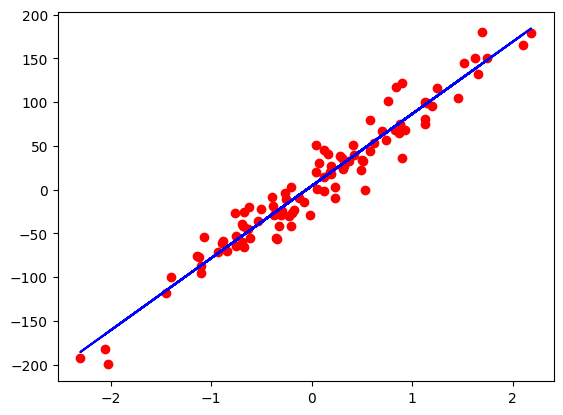

In [25]:
# 1) Design Model (input , output size , forward pass)
# 2) Construct Loss and optimizer
# 3) Training Loop:
#       - Forward pass: compute prediction
#       - Backward pass: compute gradient
#       - Update weights

import torch 
import torch.nn as nn
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt

# prepare data 
x_numpy , y_numpy = datasets.make_regression(n_samples=100 , n_features=1 , noise = 20 , random_state=1) 

# This values is in numpy aarray , so we have to convert it in tensor and float32 as well

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0] , 1)
n_samples , n_features = x.shape


# Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters() , lr = 0.1)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(x)
    loss = criterion(y_predicted , y)

    # backward pass
    loss.backward()

    #update
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1} , loss = {loss.item():.4f}')


#plot
predicted = model(x).detach().numpy()
plt.plot(x_numpy, y_numpy , 'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()

Logistic Regression using pytorch

In [31]:
# 1) Design Model (input , output size , forward pass)
# 2) Construct Loss and optimizer
# 3) Training Loop:
#       - Forward pass: compute prediction
#       - Backward pass: compute gradient
#       - Update weights

import torch 
import torch.nn as nn
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#preparing data
bc = datasets.load_breast_cancer()
x , y = bc.data , bc.target

n_samples , n_features = x.shape

#scale
sc = StandardScaler()
x = sc.fit_transform(x)

#train test split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=12)

#convert to tensor
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

#reshape y
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0] , 1)

#model
class LogisticRegression(nn.Module):
    def __init__(self , n_input_features):
        super(LogisticRegression , self).__init__() #super is used to call the constructor of the parent class
        self.linear = nn.Linear(n_input_features,1)
    
    def forward(self , x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

#loss 
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = .01)

#training
num_epochs = 100
for epoch in range(num_epochs):
    y_predicted = model(x_train)
    loss = criterion(y_predicted,y_train)

    #backprop
    loss.backward()

    #update
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

#store the prediction history
with torch.no_grad():
    y_predicted = model(x_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc.item():.4f}')

epoch: 10, loss = 0.5221
epoch: 20, loss = 0.4411
epoch: 30, loss = 0.3882
epoch: 40, loss = 0.3506
epoch: 50, loss = 0.3223
epoch: 60, loss = 0.3001
epoch: 70, loss = 0.2820
epoch: 80, loss = 0.2671
epoch: 90, loss = 0.2543
epoch: 100, loss = 0.2434
accuracy = 0.9298


Dataset and Dataloader class in pytorch

In [1]:
import torch 
import torchvision
from torch.utils.data import Dataset , DataLoader #for loading and using the datasets
import numpy as np
import math

In our reguler way for deep learning we just import the dataset and train it to the model, but when our dataset is too big and it takes time , so for this problem we can just splite dataset into batches and train the model and for this we use dataset and dataloader in pytorch

In [2]:
class WineDataset(Dataset):
    def __init__(self):
        # load dataset
    
    def __getitem__(self,index):
        #return the index of dataset

    def __len__(self):
        #return the length of dataset

IndentationError: expected an indented block after function definition on line 2 (1484066002.py, line 5)